<a href="https://colab.research.google.com/github/MuhamadAnang/PCVK/blob/main/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 50


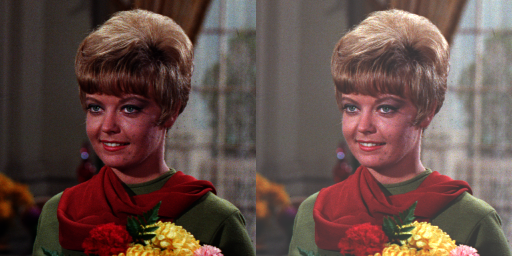

In [7]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
print('mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

# cara simple tanpa for loop
# brightness_image = cv.cpmverScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)


**TUGAS PRAKTIKUM**
1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:  

melakukan inverse pada Citra
--------------------------------


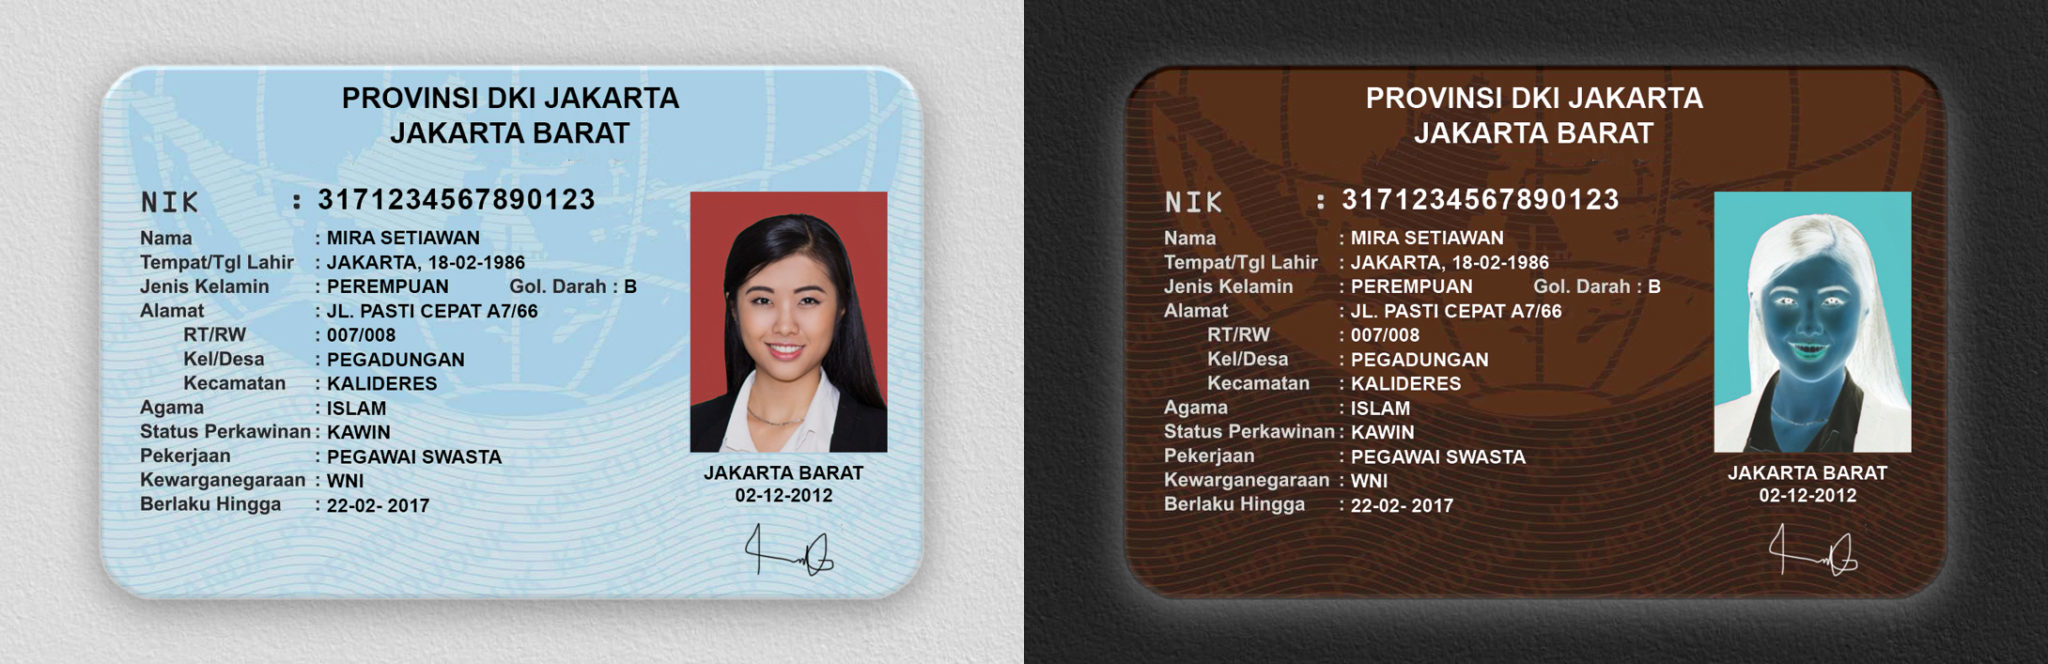

In [28]:
ktp = cv.imread("/content/drive/MyDrive/ktp.jpg")

print('melakukan inverse pada Citra')
print('--------------------------------')
inverse = 255 - ktp

final_frame = cv.hconcat([ktp,inverse])

# Menampilkan citra hasil
cv2_imshow(final_frame)

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut:

Mengubah kontras dan tingkat kecerahan citra
--------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 50
Masukkan kontras[1.0 - 3.0]: 2


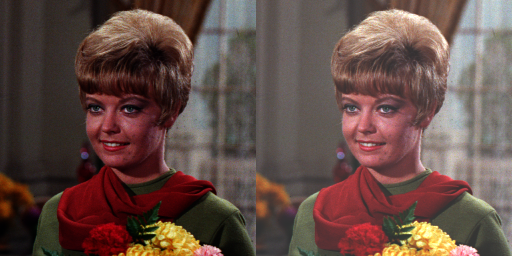

In [13]:
def truncate(value):
    if value < 0:
        return 0
    elif value > 255:
        return 255
    else:
        return value

print('Mengubah kontras dan tingkat kecerahan citra')
print('--------------------------------')

try:
  brightness = int(input('Masukkan tingkat kecerahan [-255 - 255]: '))
  contrast = int(input('Masukkan kontras[1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Images/female.tiff')

# mengubah tingkat kecerahan & Mengubah kontras
brightness_contrast_image = np.zeros(original.shape, original.dtype)

factor = (259 * (contrast + 255)) / (255 * (259 - contrast))

for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            # Transformasi brightness dan contrast
            pixel_value = factor * (original[y, x, c] - 128) + 128 + brightness
            # Terapkan fungsi truncate
            brightness_contrast_image[y, x, c] = truncate(pixel_value)

# Menggabungkan citra asli dan hasil transformasi
final_frame = cv.hconcat([original, brightness_contrast_image.astype(np.uint8)])

# Menampilkan citra hasil
cv2_imshow(final_frame)

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log, sehingga menghasilkan keluaran seperti berikut:

Transformasi Logarithmic Brightness dengan Input Kecerahan pada citra
--------------------------------------------------------------------
Masukkan nilai kecerahan : 50


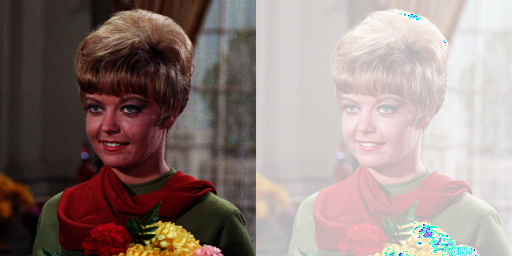

In [20]:
# Fungsi truncate untuk membatasi nilai pixel dalam rentang 0-255
def truncate(value):
    if value < 0:
        return 0
    elif value > 255:
        return 255
    else:
        return value

print('Transformasi Logarithmic Brightness dengan Input Kecerahan pada citra')
print('--------------------------------------------------------------------')

try:
    brightness = int(input('Masukkan nilai kecerahan : '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Images/female.tiff')

# Mengubah tingkat kecerahan dengan operasi penambahan nilai brightness
brightness_adjusted_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        # Tambah brightness ke setiap piksel dan gunakan fungsi truncate
        brightness_adjusted_image[y, x] = (original[y, x] + brightness)

# Menentukan konstanta c untuk transformasi logaritma
c = 255 / np.log(1 + np.max(brightness_adjusted_image))

# Menerapkan transformasi logaritma pada setiap piksel
log_image = c * (np.log(1 + brightness_adjusted_image))

# Mengubah hasil menjadi tipe uint8 untuk citra
log_image = np.array(log_image, dtype=np.uint8)

# Menggabungkan citra asli, hasil penyesuaian brightness, dan hasil transformasi logaritmik
final_frame = cv.hconcat([original, log_image])

# Menampilkan citra hasil
cv2_imshow(final_frame)

4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

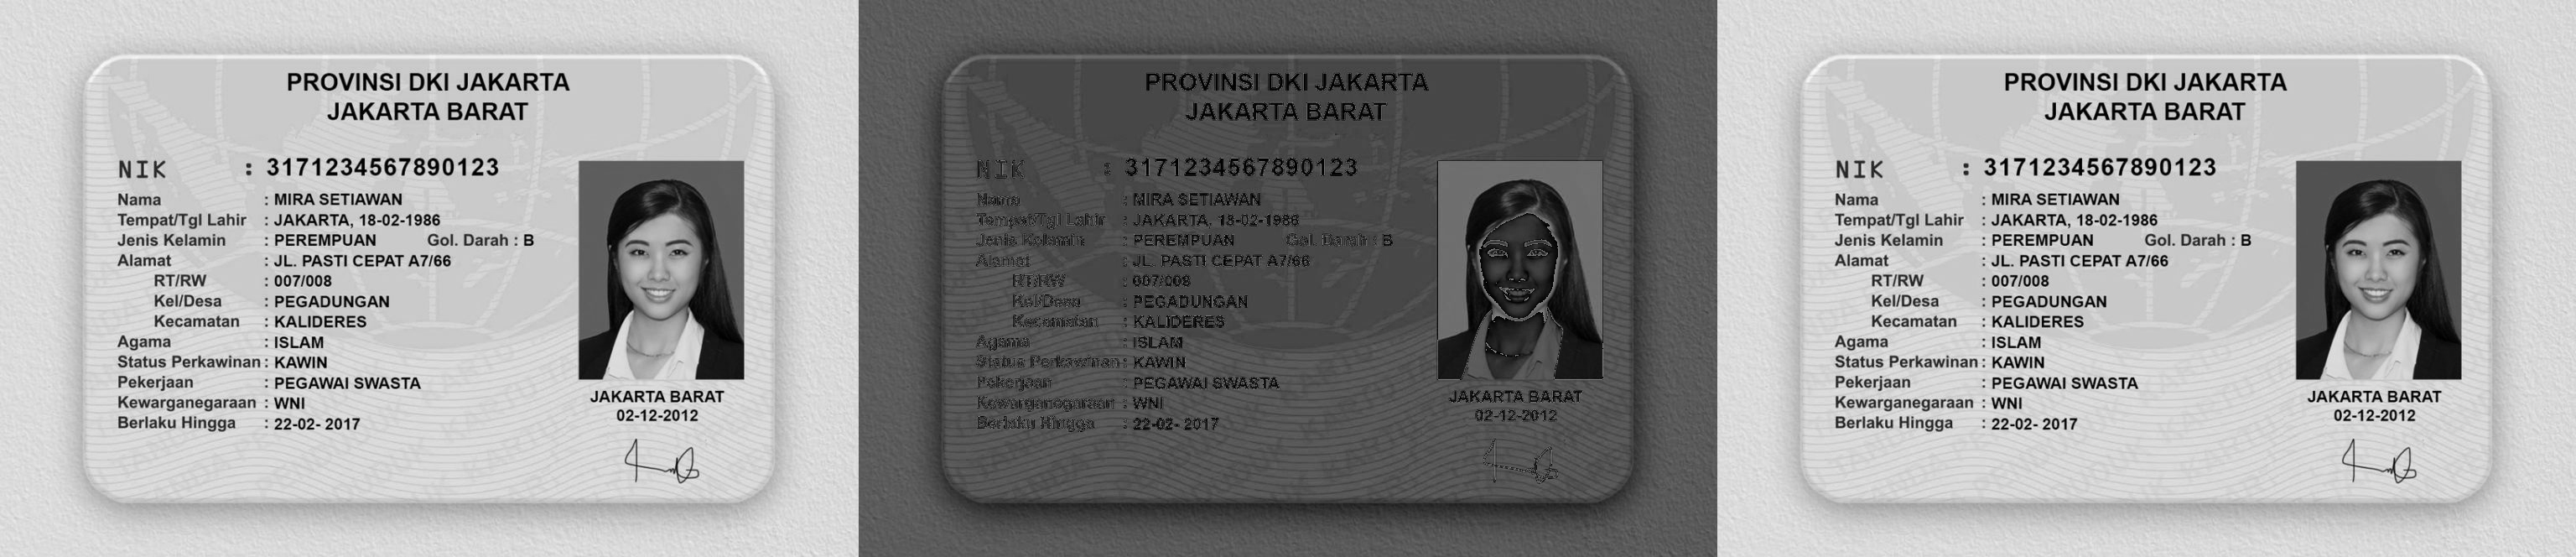

In [24]:
# Fungsi untuk Grayscale menggunakan metode Averaging
def grayscale_avg(image):
    return np.mean(image, axis=2).astype(np.uint8)

# Fungsi untuk Grayscale menggunakan metode Lightness
def grayscale_lightness(image):
    max_rgb = np.max(image, axis=2)
    min_rgb = np.min(image, axis=2)
    return ((max_rgb + min_rgb) / 2).astype(np.uint8)

# Fungsi untuk Grayscale menggunakan metode Luminance
def grayscale_luminance(image):
    return (0.21 * image[:, :, 2] + 0.72 * image[:, :, 1] + 0.07 * image[:, :, 0]).astype(np.uint8)

# Memuat citra asli
original = cv.imread('/content/drive/MyDrive/ktp.jpg')

# Mengubah citra ke grayscale menggunakan metode Averaging
gray_avg = grayscale_avg(original)

# Mengubah citra ke grayscale menggunakan metode Lightness
gray_lightness = grayscale_lightness(original)

# Mengubah citra ke grayscale menggunakan metode Luminance
gray_luminance = grayscale_luminance(original)

# Menggabungkan hasil grayscale ke dalam satu citra untuk perbandingan
final_frame = cv.hconcat([gray_avg, gray_lightness, gray_luminance])

# Menampilkan citra hasil
cv2_imshow(final_frame)


5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale seperti pada contoh berikut:

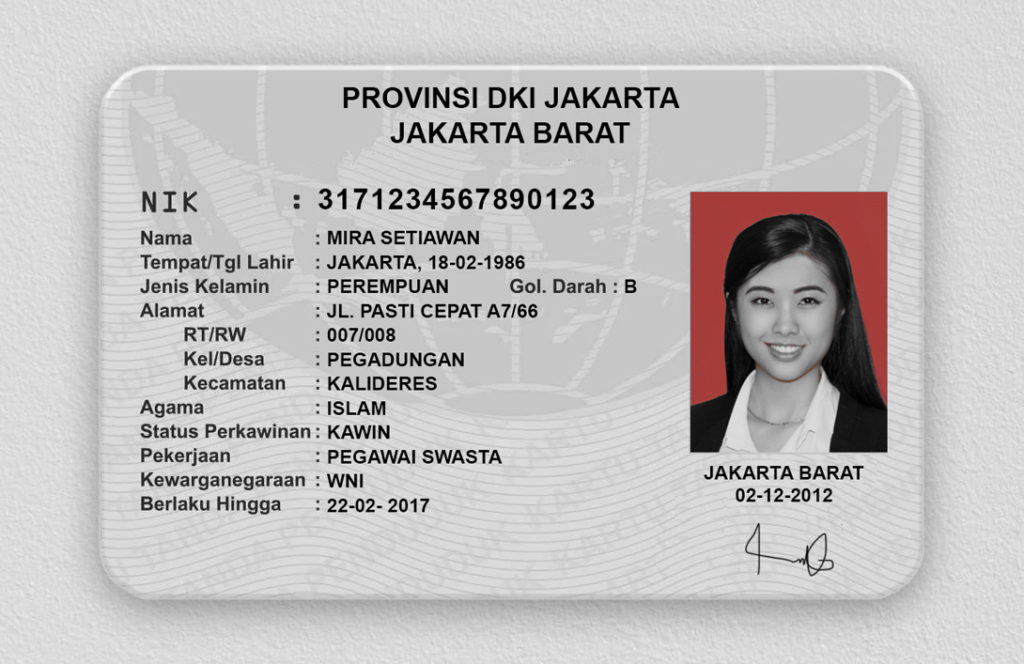

In [26]:
original = cv.imread('/content/drive/MyDrive/ktp.jpg')
result = np.zeros(image.shape, image.dtype)

lower_red = np.array([0, 0, 100])
upper_red = np.array([80, 80, 255])
mask_red = cv.inRange(original, lower_red, upper_red)

gray_image = cv.cvtColor(original, cv.COLOR_BGR2GRAY)
gray_bgr = cv.cvtColor(gray_image, cv.COLOR_GRAY2BGR)

colored_part = cv.bitwise_and(original, original, mask=mask_red)
gray_part = cv.bitwise_and(gray_bgr, gray_bgr, mask=cv.bitwise_not(mask_red))

final_image = cv.add(colored_part, gray_part)
cv2_imshow(final_image)